In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
!nvidia-smi

Mon Jun 14 10:18:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.11       Driver Version: 452.11       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX330      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    N/A /  N/A |     88MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [4]:
!pip install tensorflow-gpu

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]
train_path = 'E:/Official purpose/Sprint - 1/Final_Mango_Dataset/train'
valid_path = 'E:/Official purpose/Sprint - 1/Final_Mango_Dataset/validation'

In [7]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob('E:/Official purpose/Sprint - 1/Final_Mango_Dataset/train/*')

In [10]:
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('E:/Official purpose/Sprint - 1/Final_Mango_Dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10599 images belonging to 8 classes.


In [16]:
validation_set = test_datagen.flow_from_directory('E:/Official purpose/Sprint - 1/Final_Mango_Dataset/validation/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2787 images belonging to 8 classes.


In [17]:
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/10
332/332 [==============================] - 3508s 11s/step - loss: 3.5029 - accuracy: 0.3738 - val_loss: 2.1280 - val_accuracy: 0.4306
Epoch 2/10
332/332 [==============================] - 2163s 7s/step - loss: 1.4568 - accuracy: 0.5541 - val_loss: 1.6407 - val_accuracy: 0.5418
Epoch 3/10
332/332 [==============================] - 2155s 6s/step - loss: 1.1181 - accuracy: 0.6432 - val_loss: 1.8853 - val_accuracy: 0.4621
Epoch 4/10
332/332 [==============================] - 2356s 7s/step - loss: 1.1949 - accuracy: 0.6527 - val_loss: 1.9168 - val_accuracy: 0.5547
Epoch 5/10
332/332 [==============================] - 2189s 7s/step - loss: 1.1454 - accuracy: 0.6444 - val_loss: 1.4343 - val_accuracy: 0.5910
Epoch 6/10
332/332 [==============================] - 2328s 7s/step - loss: 0.9410 - accuracy: 0.6982 - val_loss: 2.0795 - val_accuracy: 0.5676
Epoch 7/10
332/332 [==============================] - 2605s 8s/step - loss: 0.9828 - accuracy: 0.7054 - val_loss: 1.3624 - val_accuracy

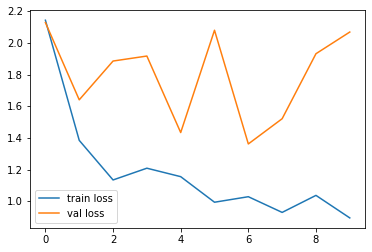

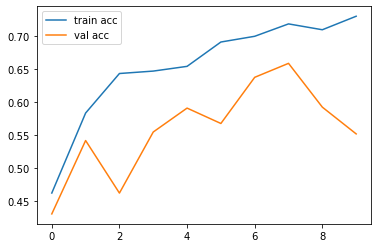

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model
model.save('E:/Official purpose/Sprint - 6/final_mango_model_resnet50.h5')

In [20]:
y_pred = model.predict(validation_set)

In [21]:
y_pred

array([[3.5694178e-02, 1.8492470e-07, 2.8711705e-11, ..., 3.8921328e-07,
        9.3614852e-01, 1.7973911e-05],
       [9.4808087e-02, 2.8989903e-06, 1.3599726e-10, ..., 1.0675301e-06,
        1.8166093e-02, 3.1149536e-04],
       [5.6923799e-02, 3.2776366e-06, 5.8495391e-07, ..., 1.2036944e-04,
        7.1486372e-01, 6.3873435e-05],
       ...,
       [2.3336338e-01, 1.8759052e-05, 6.8780928e-06, ..., 7.4991578e-01,
        9.5739393e-03, 1.1125506e-03],
       [9.4751674e-01, 1.5659833e-03, 8.6312060e-12, ..., 2.7938627e-06,
        9.4818650e-03, 6.9226694e-06],
       [5.0926685e-01, 1.4576143e-04, 1.1970000e-10, ..., 2.7469632e-05,
        3.6773738e-04, 1.1906718e-03]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([6, 3, 6, ..., 5, 0, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('E:/Official purpose/Sprint - 6/final_mango_model_resnet50.h5')

In [26]:
img=image.load_img('E:/Official purpose/Sprint - 26/Crop images/Anthracnose.jpg',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[202., 199., 180.],
        [201., 199., 178.],
        [204., 199., 179.],
        ...,
        [123., 114., 107.],
        [120., 114., 102.],
        [120., 111., 102.]],

       [[201., 198., 181.],
        [201., 198., 179.],
        [201., 199., 178.],
        ...,
        [126., 119., 109.],
        [124., 120., 108.],
        [126., 119., 111.]],

       [[201., 198., 181.],
        [199., 196., 177.],
        [200., 198., 183.],
        ...,
        [126., 122., 111.],
        [125., 121., 110.],
        [127., 120., 112.]],

       ...,

       [[191., 196., 202.],
        [186., 191., 197.],
        [183., 187., 196.],
        ...,
        [ 94.,  88.,  76.],
        [ 88.,  80.,  69.],
        [ 89.,  83.,  71.]],

       [[194., 201., 207.],
        [185., 192., 198.],
        [191., 199., 202.],
        ...,
        [100.,  92.,  81.],
        [ 91.,  83.,  72.],
        [ 88.,  82.,  70.]],

       [[191., 200., 205.],
        [189., 198., 203.],
        [187., 1

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[1.7555282e-17, 1.0000000e+00, 1.1699661e-30, 0.0000000e+00,
        1.2831114e-20, 3.9903619e-20, 5.2355404e-26, 3.8455816e-28]],
      dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a==1

array([ True])

In [34]:
import tensorflow as tf